# 최근접 이웃 (K-Nearest Neighbor)
- 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
- 분류와 회귀 모두 지원

In [92]:
import warnings

warnings.filterwarnings(action='ignore')

In [93]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [94]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류
- 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
- k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

#### 붓꽃 데이터

In [95]:
iris = load_iris()

In [96]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [97]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [98]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [99]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [100]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9916666666666667
평가 데이터 점수 : 0.9333333333333333


In [101]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [102]:
print('학습 데이터 점수 : {}'.format(model.score(X_train_scale,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale,y_test)))

학습 데이터 점수 : 0.975
평가 데이터 점수 : 0.9


In [103]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00100017, 0.00100017, 0.00100017, 0.0010004 , 0.00100017]),
 'score_time': array([0.00100136, 0.00099969, 0.00099969, 0.00199986, 0.00100088]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [104]:
param_grid = [{'n_neighbors': [3,5,7],
              'weights' : ['uniform','distance'],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute'] }]

In [105]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [106]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [107]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [108]:
print('GridSearchCV best score :{}'.format(gs.best_score_))

GridSearchCV best score :0.9800000000000001


In [109]:
def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy,Z,**params)
    
    return out

In [110]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [111]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-14.374131,-18.820038,0
1,-15.457397,-16.325954,0
2,-14.353516,-16.402164,0
3,-14.753655,-15.979300,0
4,-14.481380,-18.836336,0
...,...,...,...
145,4.411093,15.048071,2
146,4.762630,11.935350,2
147,4.678333,14.163361,2
148,3.499342,15.088404,2


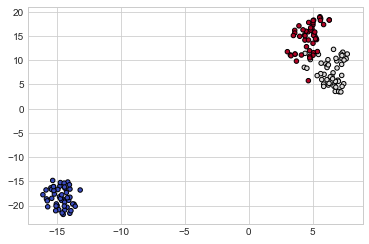

In [112]:
plt.scatter(X_comp[:,0], X_comp[:,1],
           c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [113]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

In [114]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

TypeError: cannot unpack non-iterable NoneType object

#### 유방암 데이터

In [115]:
cancer = load_breast_cancer()

In [116]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [117]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [118]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.02657,0.1721,0.05544,...,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766,1
1,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.092710,0.05627,0.1946,0.05044,...,25.73,148.20,1538.0,0.10210,0.22640,0.32070,0.12180,0.2841,0.06541,0
2,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
3,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,1
4,13.110,22.54,87.02,529.4,0.10020,0.14830,0.087050,0.05102,0.1850,0.07310,...,29.16,99.48,639.3,0.13490,0.44020,0.31620,0.11260,0.4128,0.10760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,11.940,20.76,77.87,441.0,0.08605,0.10110,0.065740,0.03791,0.1588,0.06766,...,27.29,92.20,546.1,0.11160,0.28130,0.23650,0.11550,0.2465,0.09981,1
451,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130,0
452,12.960,18.29,84.18,525.2,0.07351,0.07899,0.040570,0.01883,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,1
453,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1


In [119]:
cancer_train_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_train_df['Target'] = y_test
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,13.59,21.84,87.16,561.0,0.07956,0.08259,0.040720,0.021420,0.1635,0.05859,...,30.04,97.66,661.5,0.10050,0.17300,0.145300,0.06189,0.2446,0.07024,1
1,12.90,15.92,83.74,512.2,0.08677,0.09509,0.048940,0.030880,0.1778,0.06235,...,21.82,97.17,643.8,0.13120,0.25480,0.209000,0.10120,0.3549,0.08118,1
2,10.90,12.96,68.69,366.8,0.07515,0.03718,0.003090,0.006588,0.1442,0.05743,...,18.20,78.07,470.0,0.11710,0.08294,0.018540,0.03953,0.2738,0.07685,1
3,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,17.40,93.96,672.4,0.10160,0.05847,0.018240,0.03532,0.2107,0.06580,1
4,12.47,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,...,24.34,92.82,607.3,0.12760,0.25060,0.202800,0.10530,0.3035,0.07661,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.164000,0.095610,0.1765,0.05024,...,27.84,158.30,1656.0,0.11780,0.29200,0.386100,0.19200,0.2909,0.05865,0
110,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.056030,0.2035,0.06501,...,24.85,94.22,591.2,0.13430,0.26580,0.257300,0.12580,0.3113,0.08317,1
111,12.05,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,1
112,14.58,21.53,97.41,644.8,0.10540,0.18680,0.142500,0.087830,0.2252,0.06924,...,33.21,122.40,896.9,0.15250,0.66430,0.553900,0.27010,0.4264,0.12750,0


In [120]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [121]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9428571428571428
평가 데이터 점수 : 0.9210526315789473


In [123]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [124]:
print('학습 데이터 점수 : {}'.format(model.score(X_train_scale,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale,y_test)))

학습 데이터 점수 : 0.9758241758241758
평가 데이터 점수 : 0.9649122807017544


In [125]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [127]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00200057, 0.00200057, 0.00100088, 0.00200081, 0.00099993]),
 'score_time': array([0.00399899, 0.00500011, 0.00500011, 0.00499916, 0.00599909]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [128]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())])

In [129]:
param_grid = [{'model__n_neighbors': [3,5,7],
              'model__weights': ['uniform','distance'],
              'model__algorithm': ['ball_tree', 'kd_tree','brute']}]

In [130]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [131]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [132]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [133]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [134]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [135]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,-3.611904,-28.335194,0
1,-4.524421,-25.585722,0
2,0.354878,-24.793194,0
3,-11.455451,19.118437,0
4,1.279451,-22.447569,0
...,...,...,...
564,-6.289808,-25.385851,0
565,-0.717662,-24.277222,0
566,17.493011,-15.218309,0
567,-2.219107,-25.221348,0


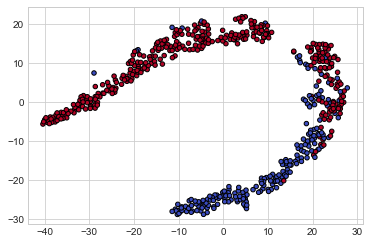

In [136]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [137]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

In [138]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

TypeError: cannot unpack non-iterable NoneType object

## K 최근접 이웃 회귀
- k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
- 이웃 데이터 포인트의 평균이 예측 결과

#### 보스턴 주택 가격 데이터

In [140]:
boston = load_boston()

In [141]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['Target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [142]:
X,y = boston.data, boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [143]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [144]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [145]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.7023616726081106
평가 데이터 점수 : 0.5136111539291981


In [146]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [147]:
print('학습 데이터 점수 : {}'.format(model.score(X_train_scale,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale,y_test)))

학습 데이터 점수 : 0.8621380901965947
평가 데이터 점수 : 0.732153447565436


In [149]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [150]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00199986, 0.00200105, 0.00092888, 0.00100017, 0.00200009]),
 'score_time': array([0.00100231, 0.00199986, 0.0010004 , 0.00299978, 0.00099993]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [151]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())])

In [152]:
param_grid = [{'model__n_neighbors': [3,5,7],
              'model__weights': ['uniform','distance'],
              'model__algorithm': ['ball_tree', 'kd_tree','brute']}]

In [153]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [154]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [155]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [156]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [162]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [163]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,8.721950,24.0
1,-15.851033,21.6
2,-11.974822,34.7
3,-12.908138,33.4
4,-13.161236,36.2
...,...,...
501,1.915591,22.4
502,1.286089,20.6
503,0.529436,23.9
504,0.572126,22.0


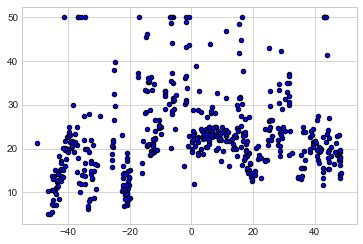

In [165]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [166]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

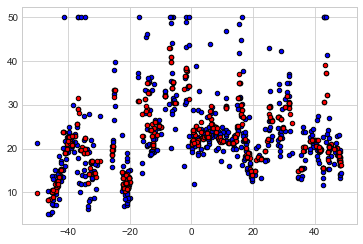

In [167]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

#### 캘리포니아 주택 가격 데이터

In [169]:
california = fetch_california_housing()

In [170]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [171]:
X,y = california.data, california.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [172]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [173]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [174]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.4580699929127158
평가 데이터 점수 : 0.13402369721030583


In [175]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [176]:
print('학습 데이터 점수 : {}'.format(model.score(X_train_scale,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale,y_test)))

학습 데이터 점수 : 0.7952150984602991
평가 데이터 점수 : 0.6833562791561409


In [177]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [178]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    1.4s finished


{'fit_time': array([0.0184381 , 0.0234406 , 0.02544141, 0.02059793, 0.01944208]),
 'score_time': array([0.33194518, 0.26853609, 0.26704264, 0.33992434, 0.31748128]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [179]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())])

In [180]:
param_grid = [{'model__n_neighbors': [3,5,7],
              'model__weights': ['uniform','distance'],
              'model__algorithm': ['ball_tree', 'kd_tree','brute']}]

In [181]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [182]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [183]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [184]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [185]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [186]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,71.007683,4.526
1,32.762421,3.585
2,50.648243,3.521
3,45.384743,3.413
4,43.699558,3.422
...,...,...
20635,-51.496788,0.781
20636,69.217743,0.771
20637,-84.283623,0.923
20638,-0.012669,0.847


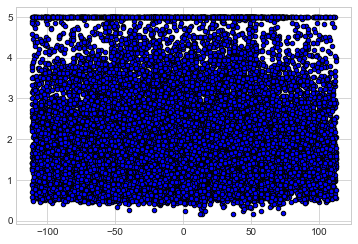

In [187]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [188]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

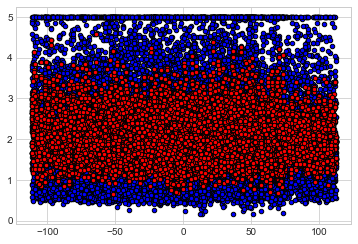

In [189]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')